<a href="https://colab.research.google.com/github/hrashidBI/TSF-GRIF-Hrashid/blob/main/Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster 

In [4]:
dset = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
dset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,31,33,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
dset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.336500e+04,23365.000000,23365.000000,23365.000000,23365.000000,23365.000000,23365.000000,22256.000000,2.225600e+04,23364.000000,...,4.680000e+02,1.0,9.600000e+01,1.0,743.000000,569.000000,23364.000000,23364.000000,23364.000000,23364.000000
mean,1.979562e+11,1979.498780,6.239076,15.119966,0.017633,169.702846,5.260518,23.080003,-3.904905e+03,1.344119,...,3.648175e+06,20000.0,1.250340e+06,0.0,2.939435,10.154657,-3.438581,-3.394025,0.228257,-2.511085
std,3.669247e+08,3.671631,3.369314,8.924484,0.131617,159.801963,3.302588,24.379525,5.777135e+05,1.024865,...,4.662938e+07,NaN,4.657852e+06,NaN,1.342983,35.341005,4.475623,4.524246,0.647190,4.442502
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.978012e+11,1978.000000,3.000000,7.000000,0.000000,61.000000,2.000000,12.642203,-8.601722e+01,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.980082e+11,1980.000000,6.000000,15.000000,0.000000,110.000000,3.000000,31.147131,-5.618721e+01,1.000000,...,0.000000e+00,20000.0,5.507100e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.982120e+11,1982.000000,9.000000,23.000000,0.000000,185.000000,8.000000,41.930607,9.109324e+00,1.000000,...,4.200000e+05,20000.0,6.407500e+05,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.984093e+11,1986.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,1.747763e+02,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,390.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dset.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999918,-0.059212,-0.017392,-0.060685,-0.317660,-0.095837,-0.372256,-0.004799,0.157327,...,0.005224,NaN,-0.143658,NaN,0.109527,0.088702,0.008021,0.005177,-0.186918,-0.081963
iyear,0.999918,1.000000,-0.068425,-0.017621,-0.060802,-0.317543,-0.095377,-0.371676,-0.004689,0.157513,...,0.005579,NaN,-0.145638,NaN,0.109437,0.088888,0.008041,0.005192,-0.187028,-0.081953
imonth,-0.059212,-0.068425,1.000000,0.008804,0.016360,0.010337,-0.038357,-0.027772,-0.011432,-0.033445,...,-0.036062,NaN,0.197123,NaN,0.012387,-0.014884,-0.010512,-0.009803,0.022684,-0.004548
iday,-0.017392,-0.017621,0.008804,1.000000,-0.003732,0.016506,0.002929,0.009079,-0.006665,-0.010093,...,0.001005,NaN,0.009063,NaN,0.040321,-0.024257,-0.000942,-0.002310,0.013189,0.005912
extended,-0.060685,-0.060802,0.016360,-0.003732,1.000000,-0.053796,-0.010175,-0.043429,0.000875,0.020379,...,-0.029133,NaN,-0.122566,NaN,-0.081291,0.010582,0.020177,0.027410,0.030630,0.028883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,0.088702,0.088888,-0.014884,-0.024257,0.010582,0.052646,0.149135,0.140189,0.193113,0.033800,...,0.015841,NaN,-0.045558,NaN,-0.066429,1.000000,0.008308,0.003365,-0.011073,0.009142
INT_LOG,0.008021,0.008041,-0.010512,-0.000942,0.020177,0.180055,0.071155,0.077571,0.008287,0.027912,...,0.036185,NaN,-0.044976,NaN,-0.092731,0.008308,1.000000,0.994496,0.093035,0.824546
INT_IDEO,0.005177,0.005192,-0.009803,-0.002310,0.027410,0.172371,0.074179,0.076899,0.008263,0.025949,...,0.033211,NaN,-0.040482,NaN,-0.102607,0.003365,0.994496,1.000000,0.125853,0.827685
INT_MISC,-0.186918,-0.187028,0.022684,0.013189,0.030630,0.375804,0.226748,0.263911,0.002435,-0.072094,...,-0.013810,NaN,0.019568,NaN,0.012110,-0.011073,0.093035,0.125853,1.000000,0.355128


In [8]:
dset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

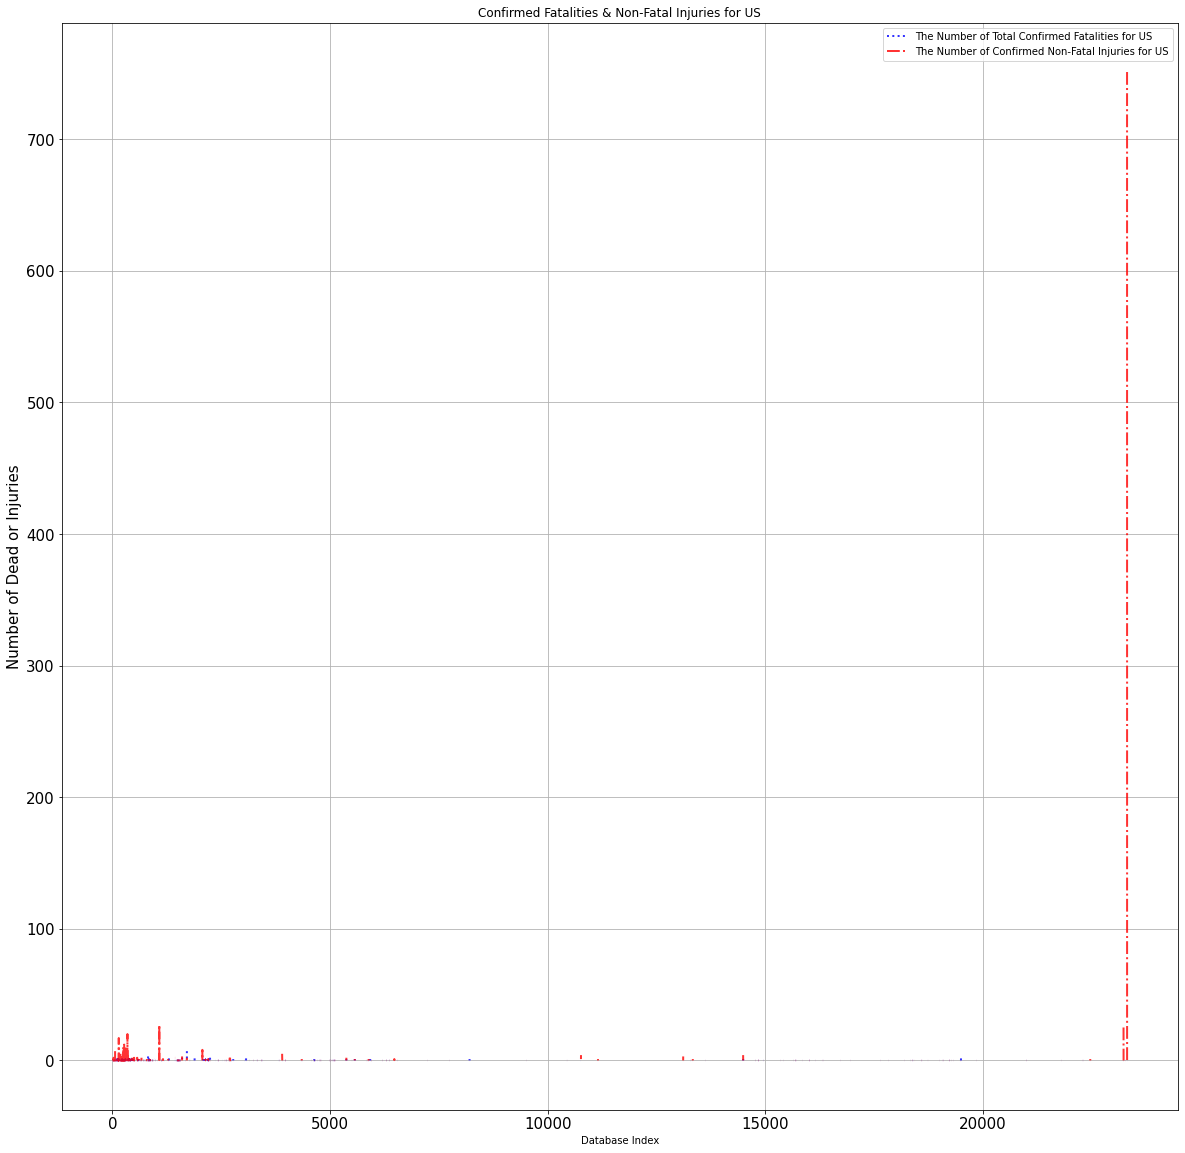

In [10]:
dset.nkillus.plot(kind = 'line', color = 'blue', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
dset.nwoundus.plot(color = "red", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

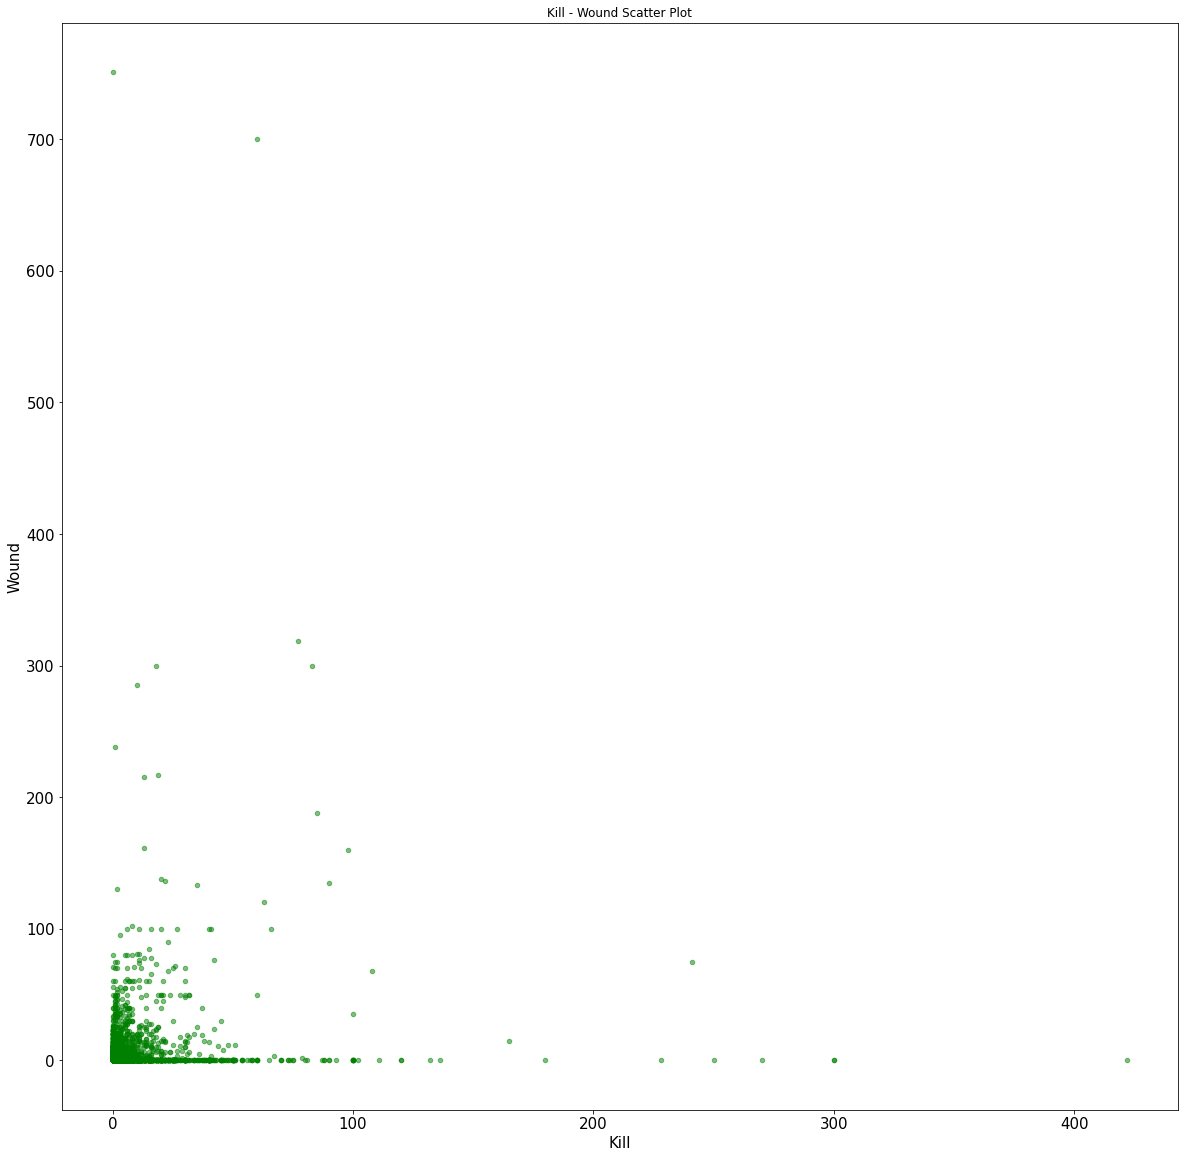

In [11]:
dset.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'green', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

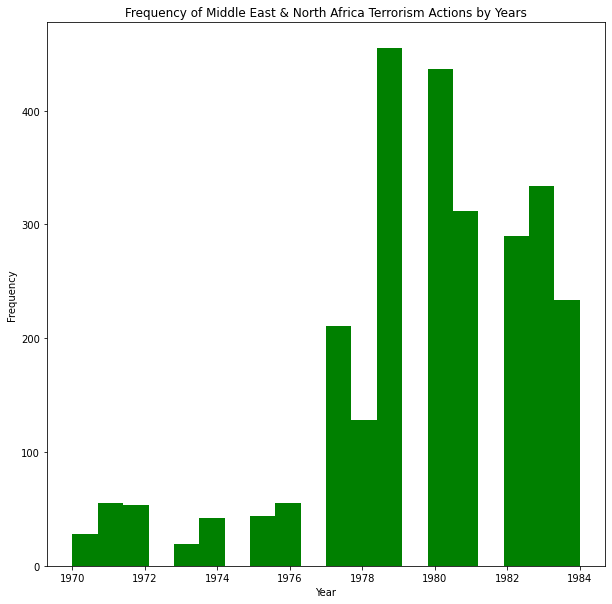

In [14]:
middleEastData = dset[dset['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 20, figsize = (10,10), color = 'green', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

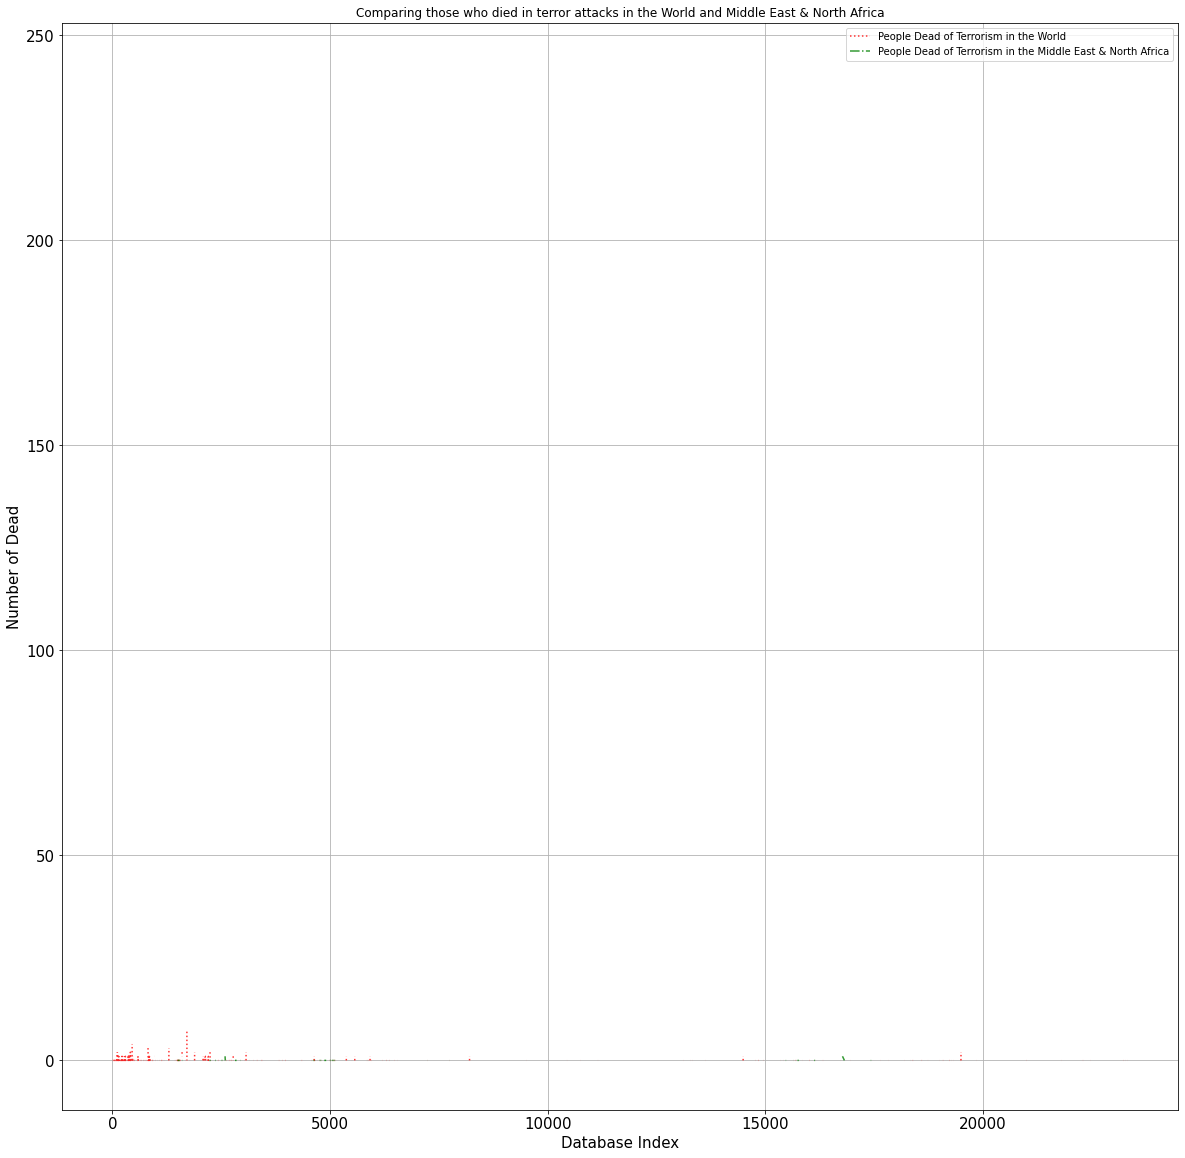

In [15]:
dset.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

In [16]:
filterYear = dset['iyear'] == 1970

In [17]:
filterData = dset[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

In [18]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [19]:
killData = dset.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 38840


In [20]:
attackData = dset.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [21]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,22601.0,4707.0,7744.0,674.0,210.0,245.0,452.0,19.0,2188.0


In [22]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


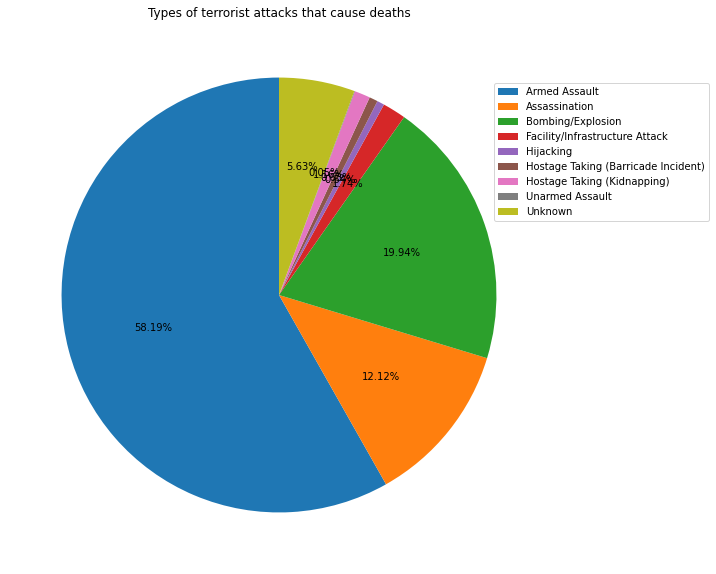

In [25]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=10) # location legend
plt.show()

In [26]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [27]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,53.0,0.0,0.0,0.0,309.0,331.0,6.0,12.0,0.0,0.0,...,4.0,0.0,44.0,65.0,70.0,0.0,4.0,1.0,5.0,59.0


In [28]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 131 entries, Afghanistan to Zimbabwe
dtypes: float64(131)
memory usage: 1.0+ KB


In [29]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

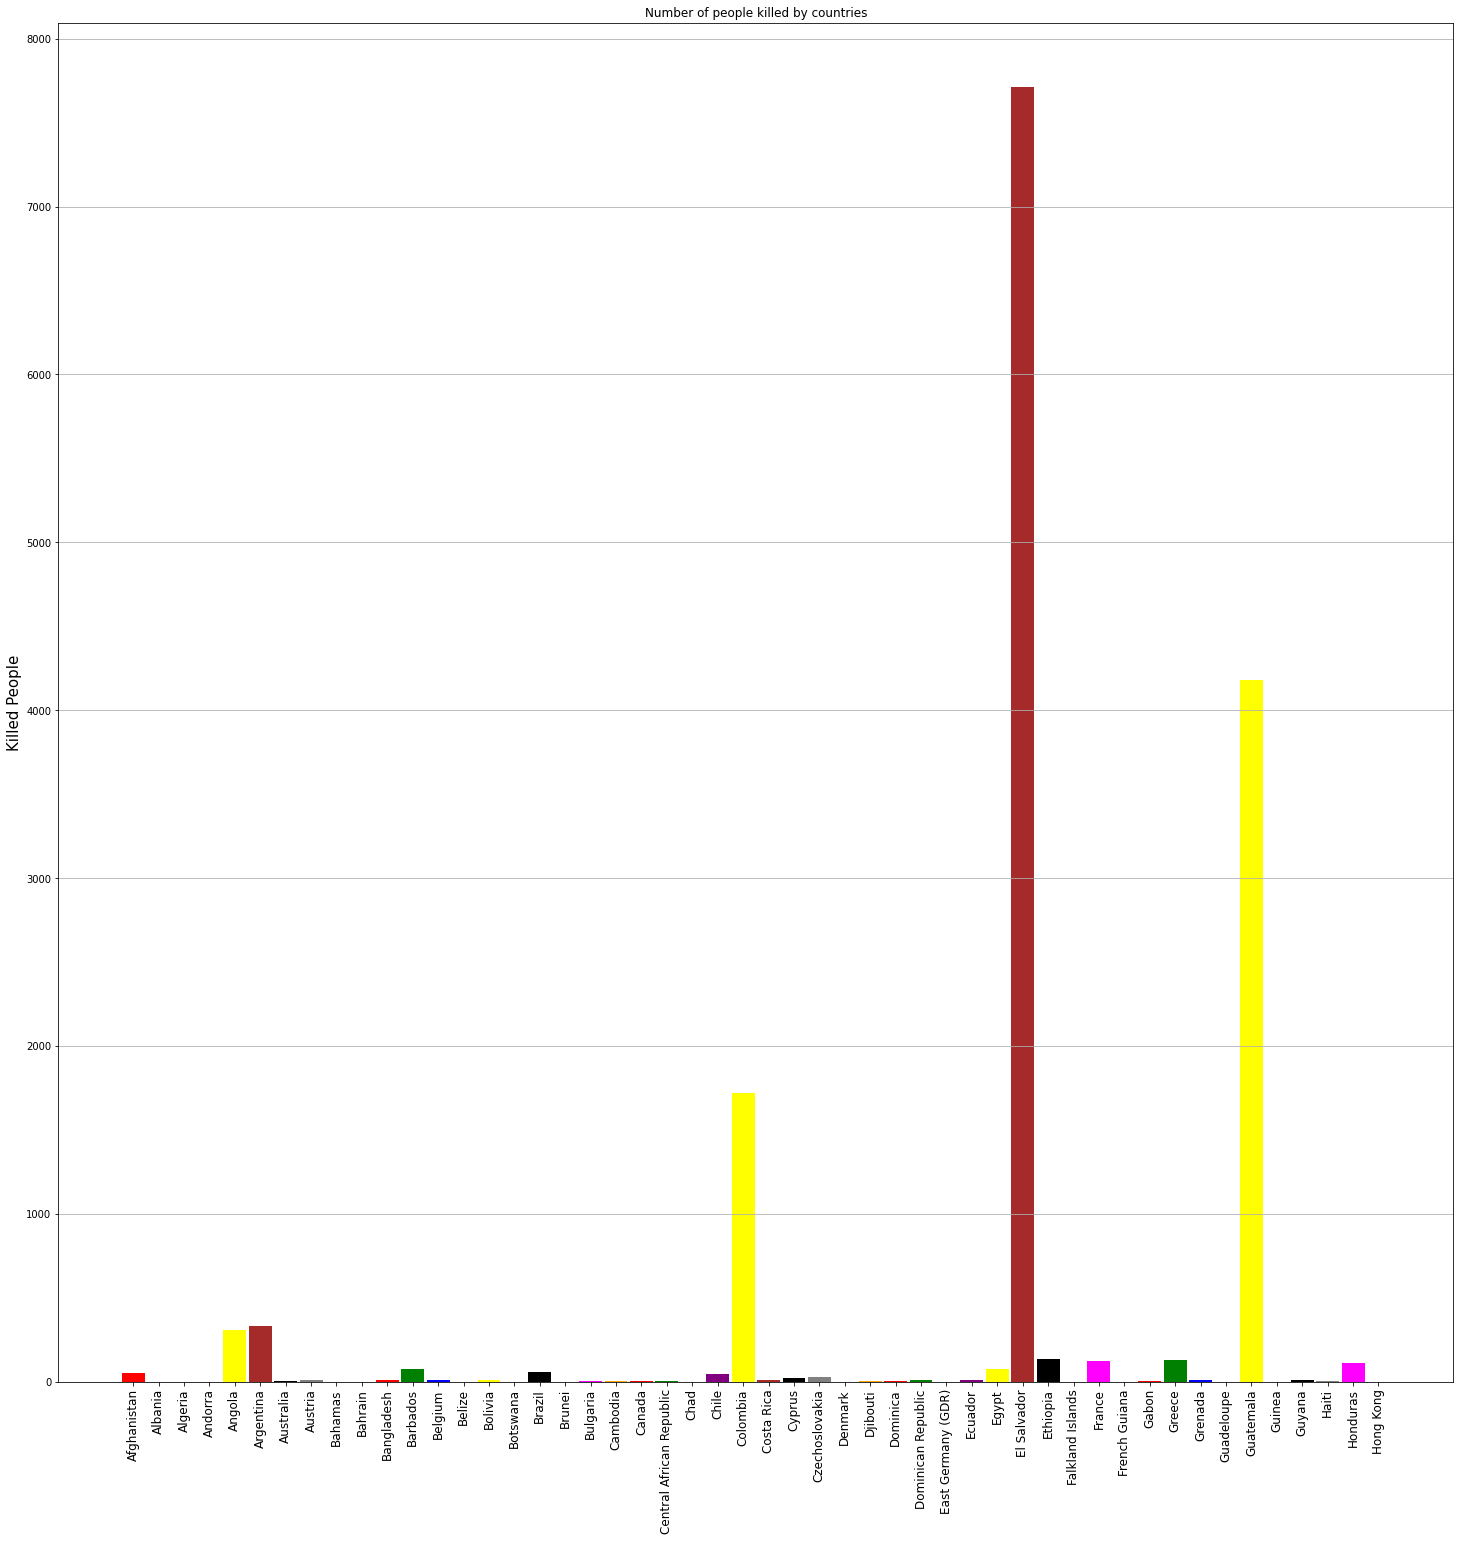

In [30]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

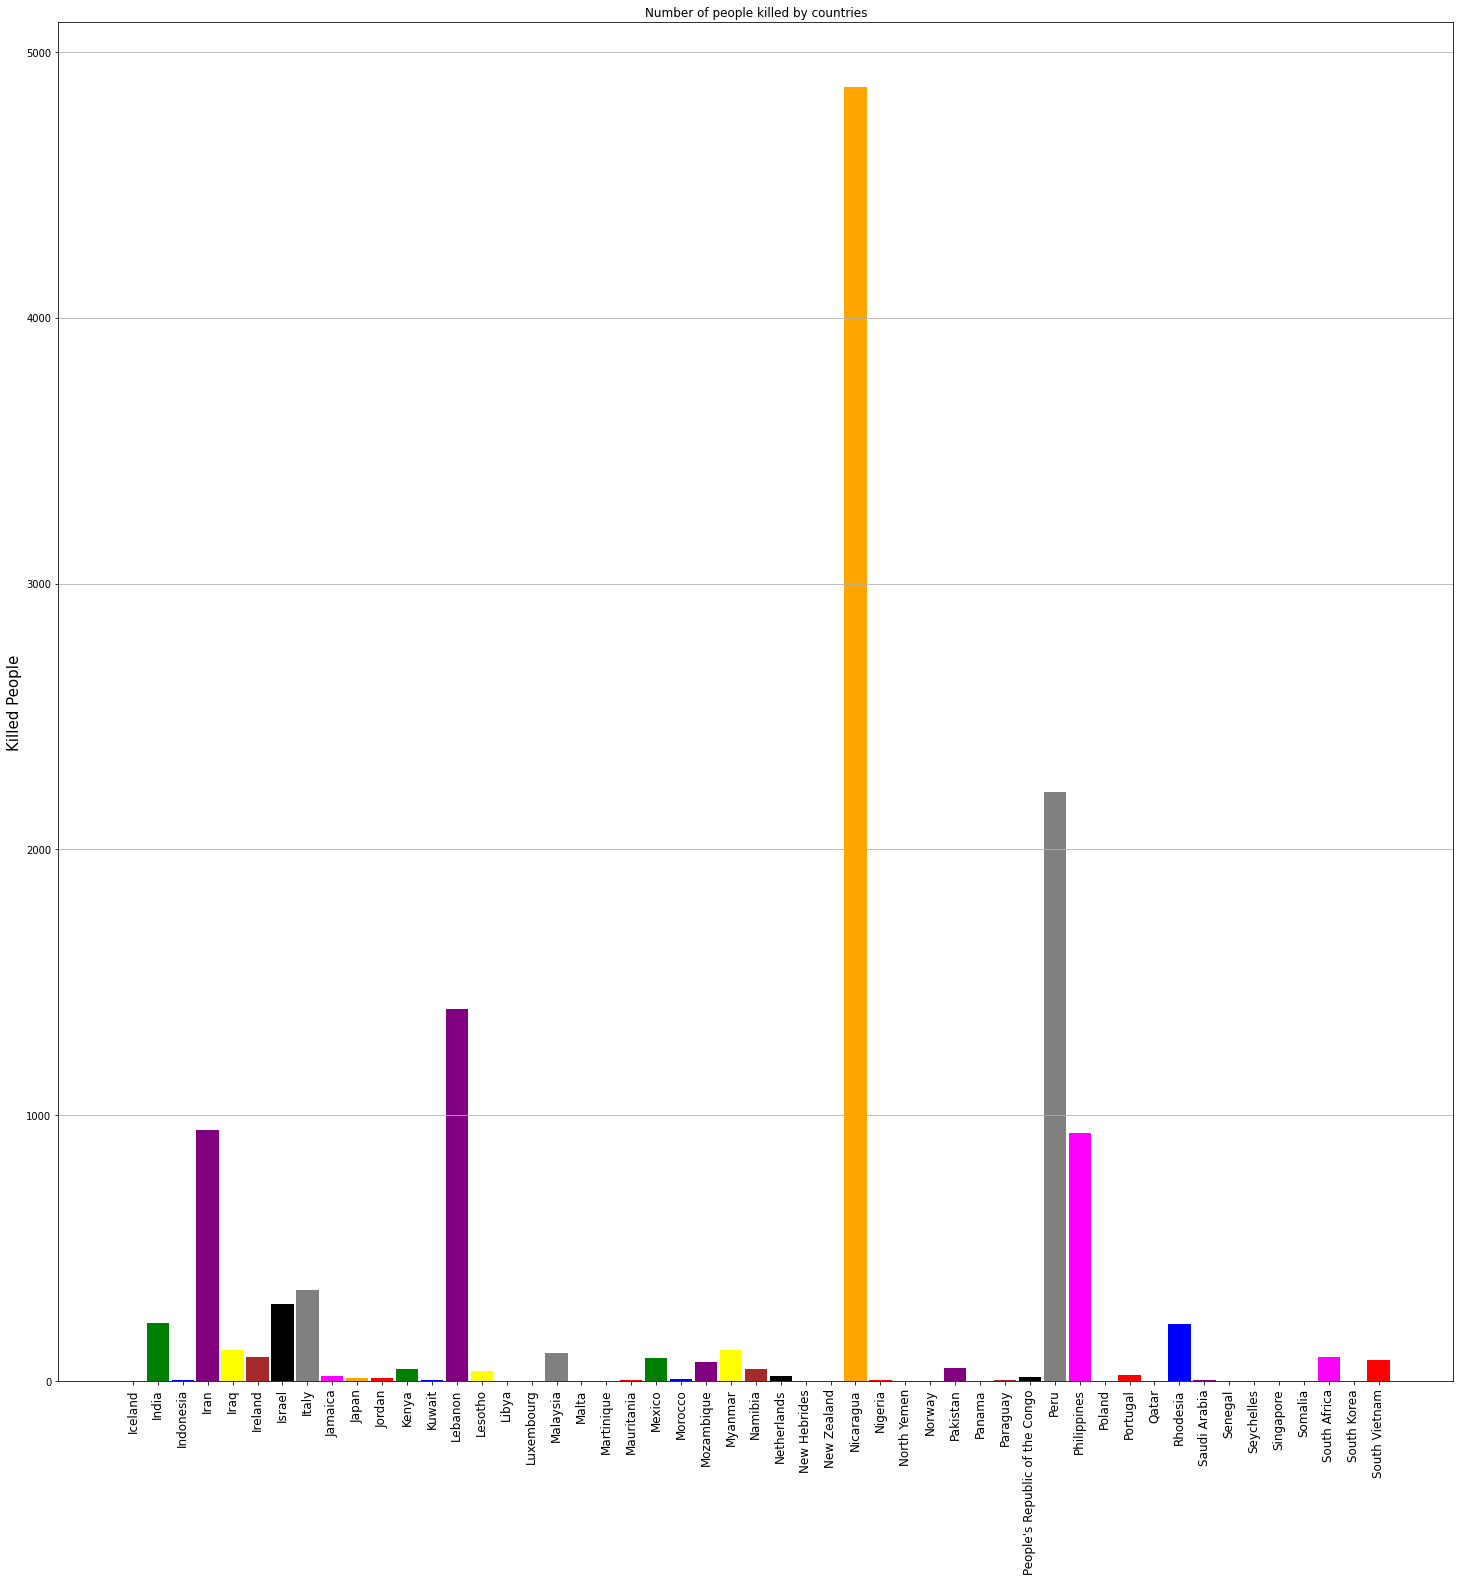

In [31]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

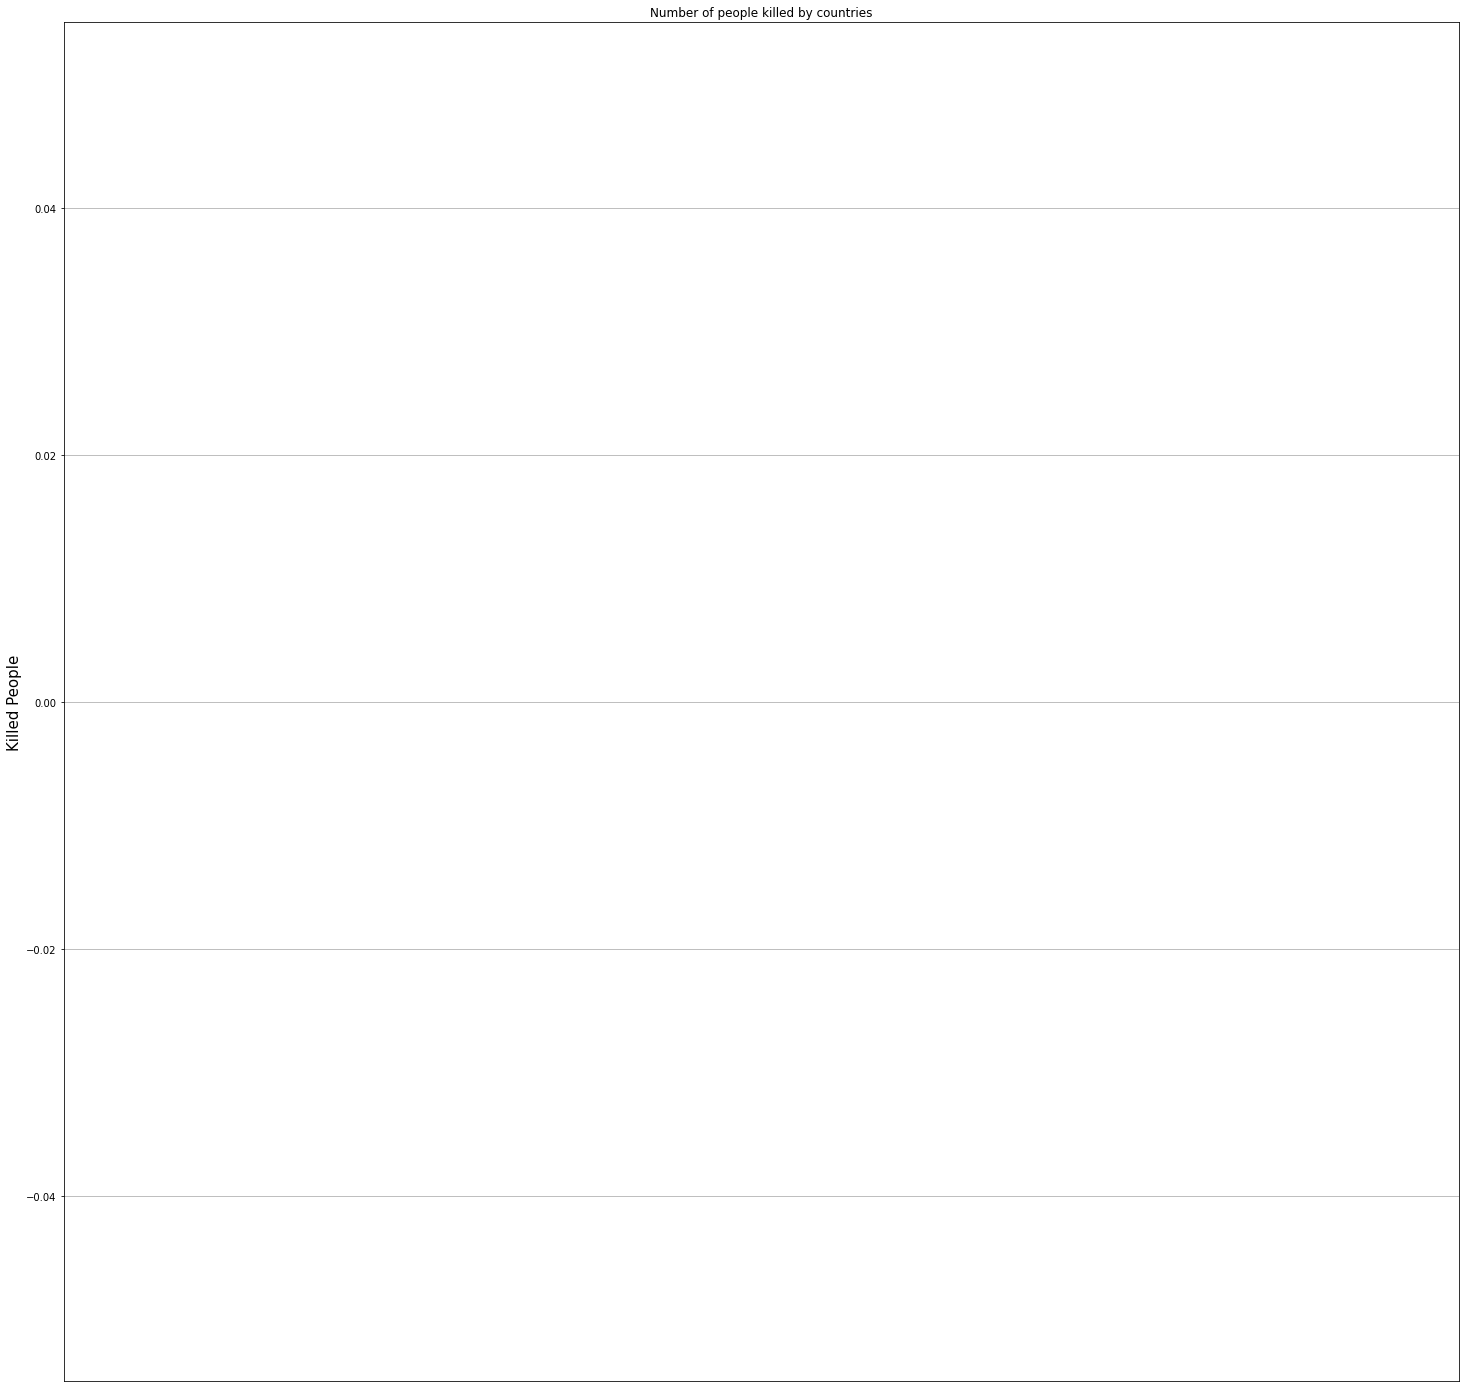

In [32]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()